In [12]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

new_train = train.T.drop_duplicates()
new = new_train.T

print(train.shape)
print(train.columns)
print(test.shape)
print(test.columns)

y_train = new.target
x_train = new.drop('target',axis=1)
x_train.fillna(-999,inplace=True)

for c in x_train.columns[x_train.dtypes=='object']:
    x_train[c] = x_train[c].factorize()[0]

/home/wb/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,9,10,11,12,43,157,196,214,225,228,229,231,235,238) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/wb/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,9,10,11,12,43,157,167,177,196,214,225,228,229,231,235,238) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(145231, 1934)
Index(['ID', 'VAR_0001', 'VAR_0002', 'VAR_0003', 'VAR_0004', 'VAR_0005',
       'VAR_0006', 'VAR_0007', 'VAR_0008', 'VAR_0009',
       ...
       'VAR_1926', 'VAR_1927', 'VAR_1928', 'VAR_1929', 'VAR_1930', 'VAR_1931',
       'VAR_1932', 'VAR_1933', 'VAR_1934', 'target'],
      dtype='object', length=1934)
(145232, 1933)
Index(['ID', 'VAR_0001', 'VAR_0002', 'VAR_0003', 'VAR_0004', 'VAR_0005',
       'VAR_0006', 'VAR_0007', 'VAR_0008', 'VAR_0009',
       ...
       'VAR_1925', 'VAR_1926', 'VAR_1927', 'VAR_1928', 'VAR_1929', 'VAR_1930',
       'VAR_1931', 'VAR_1932', 'VAR_1933', 'VAR_1934'],
      dtype='object', length=1933)


In [13]:
%matplotlib inline.


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()


In [15]:
rf.fit(x_train,y_train)

/home/wb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:

rffi = rf.feature_importances_
print(rffi)

[0.00202315 0.00020721 0.00176529 ... 0.00017832 0.00044115 0.00042922]


(9.088782697908849, 57.383006799551794)

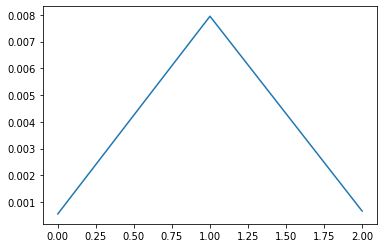

In [43]:
plt.plot(rf.feature_importances_[80:83])
len(rffi)
x_train.columns[81]
x81 = x_train.VAR_0081
x81.mean(),x81.std()

In [49]:
ytm = y_train.mean()

0.2325467703176319

In [51]:
rolling_mean = [y_train[:i].mean() for i in range(len(y_train))]

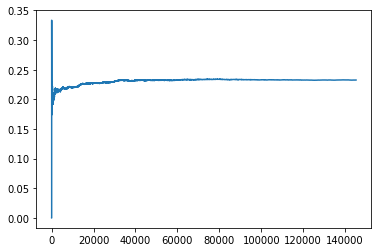

In [52]:
plt.plot(rolling_mean)

In [57]:
trnu = train.nunique()

In [61]:
trnu1=(trnu==1)

In [62]:
trnu1.sum()

51

In [64]:
plot_whole(train.head())

   ID VAR_0001  VAR_0002  VAR_0003  VAR_0004 VAR_0005  VAR_0006  VAR_0007  \
0   2        H       224         0      4300        C       0.0       0.0   
1   4        H         7        53      4448        B       1.0       0.0   
2   5        H       116         3      3464        C       0.0       0.0   
3   7        H       240       300      3200        C       0.0       0.0   
4   8        R        72       261      2000        N       0.0       0.0   

  VAR_0008 VAR_0009 VAR_0010 VAR_0011 VAR_0012  VAR_0013  VAR_0014  VAR_0015  \
0    False    False    False    False    False       0.0       0.0       0.0   
1    False    False    False    False    False       1.0       0.0       1.0   
2    False    False    False    False    False       0.0       0.0       0.0   
3    False    False    False    False    False       0.0       0.0       0.0   
4    False    False    False    False    False       0.0       0.0       0.0   

   VAR_0016  VAR_0017  VAR_0018  VAR_0019  VAR_0020  VAR

In [68]:
tris=train.isnull()

In [78]:
triss=tris.sum(axis=1)

In [81]:
triss.shape

(145231,)

In [82]:
triss2=tris.sum(axis=0)

In [84]:
triss2.head(20)

ID           0
VAR_0001     0
VAR_0002     0
VAR_0003     0
VAR_0004     0
VAR_0005     0
VAR_0006    56
VAR_0007    56
VAR_0008    56
VAR_0009    56
VAR_0010    56
VAR_0011    56
VAR_0012    56
VAR_0013    56
VAR_0014    56
VAR_0015    56
VAR_0016    56
VAR_0017    56
VAR_0018    56
VAR_0019    56
dtype: int64

In [85]:
traintest = pd.concat([train,test],axis=0)

/home/wb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [91]:
feats_counts=train.nunique(dropna=False)

In [96]:
feats_counts.sort_values()[:30]

VAR_0213    1
VAR_0207    1
VAR_0840    1
VAR_0847    1
VAR_1428    1
VAR_1165    2
VAR_0438    2
VAR_1164    2
VAR_1163    2
VAR_1162    2
VAR_0446    2
VAR_0530    2
VAR_0528    2
VAR_0924    2
VAR_0563    2
VAR_0044    2
VAR_0043    2
VAR_0042    2
VAR_0527    2
VAR_0394    2
VAR_1427    2
VAR_0246    2
VAR_0215    2
VAR_0216    2
VAR_0221    2
VAR_0222    2
VAR_0203    2
VAR_0202    2
VAR_0223    2
VAR_0199    2
dtype: int64

In [ ]:
feats_counts.sort_values()[:5]

In [98]:
new_train = train.T.drop_duplicates()

In [99]:
new_train.shape

(1883, 145231)

In [101]:
train.shape

(145231, 1934)